In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
pd.set_option('display.max_columns', None)

Q1.Use Seaborn to recreate Figure 1.1 in the book, including the models, with all 3 subplots in the same figure.

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/ds5110/rdata/main/data/Wage.csv')

df.head(10)


,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,2009,44,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,2008,30,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,2006,41,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,2004,52,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


In [18]:

df['education']= df['education'].apply(lambda x:x[0])


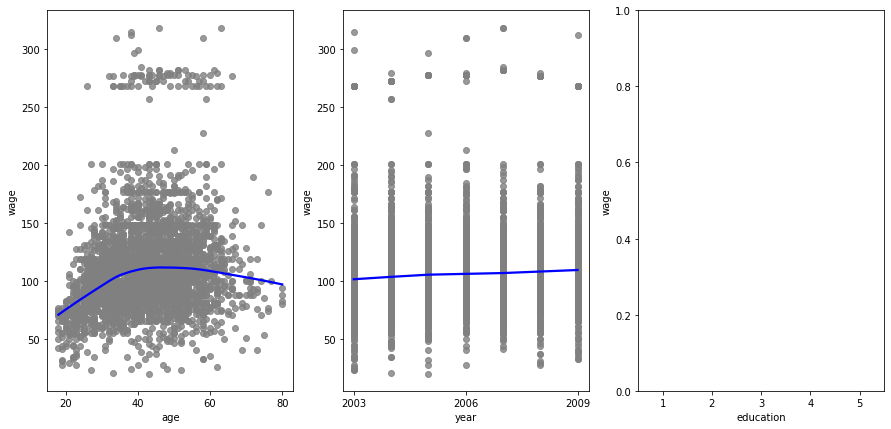

In [17]:
fig, ax = plt.subplots(1,3,figsize=(15,7))
a1 = sns.regplot(x=df['age'],y=df['wage'],lowess=True,scatter_kws={'color':'grey'},line_kws={'color':'blue'},ax=ax[0])
a1.set_xticks(ticks=[20,40,60,80])
a2 = sns.regplot(x=df['year'],y=df['wage'],lowess=True,scatter_kws={'color':'grey'},line_kws={'color':'blue'},ax=ax[1])
a2.set_xticks(ticks=[2003,2006,2009])
my_pal = {'1':'skyblue','2':'g','3':'y','4':'b','5':'orange'}
sns.boxplot(x=df['education'],y=df['wage'],order=['1','2','3','4','5'],palette=my_pal,medianprops=dict(color="black",alpha=1,linewidth=3.0,), whiskerprops = dict(linestyle='--',color='black'))



Q2.Use Seaborn with the Smarket dataset (in the rdata repo) to recreate Figure 1.2 in the book from the original (messy) dataframe.

In [6]:
smarket = pd.read_csv('https://raw.githubusercontent.com/ds5110/rdata/main/data/Smarket.csv')
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [7]:
smarket.columns = ["Year","Yesterday","Two Days Previous","Three Days Previous","Four Days Previous","Five Days Previous","Volume", "Today","Today's Direction"] 

In [8]:
smarket.head()

,Year,Yesterday,Two Days Previous,Three Days Previous,Four Days Previous,Five Days Previous,Volume,Today,Today's Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


Text(0, 0.5, 'Percentage change in S&P')

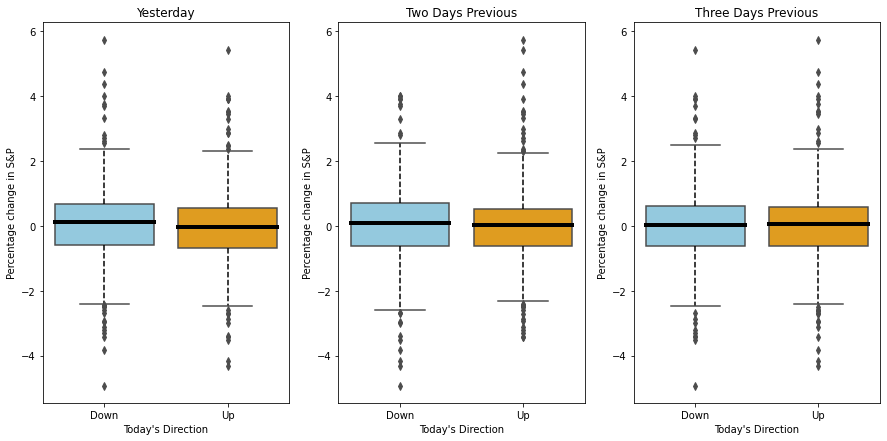

In [9]:
fig, ax = plt.subplots(1,3,figsize=(15,7))
pat={"Down":"skyblue","Up":"orange"}
a4=sns.boxplot(x=smarket["Today's Direction"],y=smarket['Yesterday'],order=['Down','Up'],palette=pat,ax=ax[0],medianprops=dict(color="black",alpha=1,linewidth=4.0,), whiskerprops = dict(linestyle='--',color='black'))
a4.set_title('Yesterday')
a4.set_ylabel('Percentage change in S&P')
a5=sns.boxplot(x=smarket["Today's Direction"],y=smarket['Two Days Previous'],order=['Down','Up'],palette=pat,ax=ax[1],medianprops=dict(color="black",alpha=1,linewidth=4.0,), whiskerprops = dict(linestyle='--',color='black'))
a5.set_title('Two Days Previous')
a5.set_ylabel('Percentage change in S&P')
a6=sns.boxplot(x=smarket["Today's Direction"],y=smarket['Three Days Previous'],order=['Down','Up'],palette=pat,ax=ax[2],medianprops=dict(color="black",alpha=1,linewidth=4.0,), whiskerprops = dict(linestyle='--',color='black'))
a6.set_title('Three Days Previous')
a6.set_ylabel('Percentage change in S&P')



Q3.Put a dataframe with the Smarket dataset into tidy form. Use .head() to print the first few lines the result.

In [10]:
s = pd.read_csv('https://raw.githubusercontent.com/ds5110/rdata/main/data/Smarket.csv')
s.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [11]:
new_smarket = s.melt(id_vars =["Year","Volume","Direction"],
            var_name = "Lag", 
            value_name = "Percentage change in S&P")
new_smarket.columns =['Year','Volume',"Today's Direction","Day","Percentage change in S&P"]
new_smarket.head()

,Year,Volume,Today's Direction,Day,Percentage change in S&P
0,2001,1.1913,Up,Lag1,0.381
1,2001,1.2965,Up,Lag1,0.959
2,2001,1.4112,Down,Lag1,1.032
3,2001,1.2760,Up,Lag1,-0.623
4,2001,1.2057,Up,Lag1,0.614


Q4.Recreate Figure 1.2 with Seaborn using the tidy form of the Smarket dataset.

In [12]:

a=new_smarket.loc[(new_smarket.Day== "Lag1") ]
b=new_smarket.loc[(new_smarket.Day== "Lag2") ]
c=new_smarket.loc[(new_smarket.Day== "Lag3") ]
a

,Year,Volume,Today's Direction,Day,Percentage change in S&P
0,2001,1.19130,Up,Lag1,0.381
1,2001,1.29650,Up,Lag1,0.959
2,2001,1.41120,Down,Lag1,1.032
3,2001,1.27600,Up,Lag1,-0.623
4,2001,1.20570,Up,Lag1,0.614
...,...,...,...,...,...
1245,2005,1.88850,Up,Lag1,0.422
1246,2005,1.28581,Down,Lag1,0.043
1247,2005,1.54047,Up,Lag1,-0.955
1248,2005,1.42236,Down,Lag1,0.130


Text(0, 0.5, 'Percentage change in S&P')

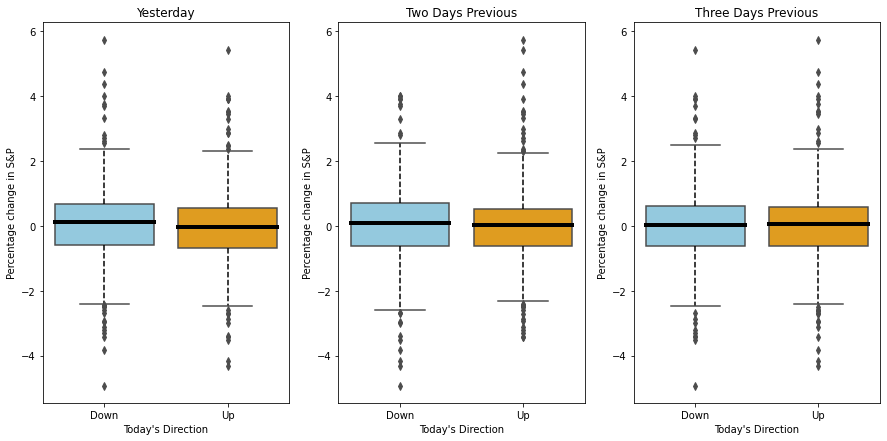

In [13]:

fig, ax = plt.subplots(1,3,figsize=(15,7))
pat={"Down":"skyblue","Up":"orange"}
b1=sns.boxplot(x=a["Today's Direction"],y=a['Percentage change in S&P'],order=['Down','Up'],palette=pat,ax=ax[0],medianprops=dict(color="black",alpha=1,linewidth=4.0,), whiskerprops = dict(linestyle='--',color='black'))
b1.set_title('Yesterday')
b1.set_ylabel('Percentage change in S&P')
b2=sns.boxplot(x=b["Today's Direction"],y=b['Percentage change in S&P'],order=['Down','Up'],ax=ax[1],palette=pat,medianprops=dict(color="black",alpha=1,linewidth=4.0,), whiskerprops = dict(linestyle='--',color='black'))
b2.set_title('Two Days Previous')
b2.set_ylabel('Percentage change in S&P')
b3=sns.boxplot(x=c["Today's Direction"],y=c['Percentage change in S&P'],order=['Down','Up'],ax=ax[2],palette=pat,medianprops=dict(color="black",alpha=1,linewidth=4.0,), whiskerprops = dict(linestyle='--',color='black'))
b3.set_title('Three Days Previous')
b3.set_ylabel('Percentage change in S&P')